&copy;  C. Lázaro, Universidad Politécnica de Valencia, 2015

# Form finding of planar flexible rods (5)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
import scipy.special as sp

## 1 Exact solution of the elastica using elliptic integrals

### 1.1 Expression of the arc-length

We start from the expression of the moment in terms of the rotation of the cross section  

$$M = \pm\sqrt{2EI (\mathcal{H} + |P| \cos\theta)}$$
with $P < 0$, and the constitutive relation
$$M = EI \, \frac{d \theta}{ds}$$ 

Equating both expressions and rearranging we get the differential equation defining $s(\theta)$ with the static invariants -compressive force and density of potential energy- as parameters:   

$$\sqrt{\frac{|P|}{EI}} \sqrt{\frac{1 + \mathcal{H}/|P|}{2}} \,\,ds = \frac{1}{2} \frac{d \theta}{\sqrt{1 + \frac{2}{1 - \mathcal{H}/|P|} \sin^2 \frac{\theta}{2}}}$$

Note that the radicands are positive for $P < 0$ and $-1 < \frac{\mathcal{H}}{|P|} < 1$

It is useful to observe that the static invariants have their geometric counterparts:
1. The rotation at the start of the rod (null $M$ section) $\theta_0$, given by the relation
$$\cos \theta_0 = -\frac{\mathcal{H}}{|P|}$$
2. The critical length; i.e. the lenght of a rod wiht Euler critical load equal to $P$, given by the relation
$$d_{crit} = \pi \sqrt{\frac{EI}{|P|}}$$

Hence we may write the differential equation in terms of the geometric parameters as

$$\frac{\pi}{d_{crit}} ds = \frac{1}{2}\frac{d\theta}{\sqrt{\sin^2\frac{\theta_0}{2} - \sin^2\frac{\theta}{2}}}$$

Thus, the solution (starting from an inflexion) will be given by the following integral in terms of the normalized arc-length $\zeta = s / d_{crit}$

$$\zeta = \frac{1}{2\pi} \int_{-\theta_0}^{\theta} \frac{d\vartheta}{\sqrt{\sin^2\frac{\vartheta_0}{2} - \sin^2\frac{\vartheta}{2}}}$$

It is very remarkable to observe that the normalized arc-length $\zeta = s / d_{crit}$ is _completely_ defined once the initial angle $\theta_0$ is given, and depends _only_ on this later parameter.

This expression has a limited applicability because $\theta$ takes values in the interval $-\theta_0 < \theta < \theta_0$, therefore the values of $\zeta$ can only be computed up to the rotation $\theta_0$.

The following change of variable $\sin \omega = \frac{\sin\frac{\theta}{2}}{\sin\frac{\theta_0}{2}}$ elliminates the restriction in the integration and also allows to express the solution in terms of _elliptic integrals_. The result is

$$\varsigma = \frac{1}{\pi} \int_{-\frac{\pi}{2}}^{\omega} \frac{dw}{\sqrt{1 - k^2 \sin^2 w}}$$
with $k = \sin\frac{\theta_0}{2}$

This integral can be manipulated using the _incomplete_ and the _complete elliptic integral of the first kind_

$$F(\omega, k) = \int_{0}^{\omega} \frac{dw}{\sqrt{1 - k^2 \sin^2 w}} \;\;\;\;\;\;\;\;K(k) = \int_{0}^{\frac{\pi}{2}} \frac{dw}{\sqrt{1 - k^2 \sin^2 w}}$$

$$ \varsigma = \frac{1}{\pi} \biggl(\int_{-\frac{\pi}{2}}^{0} \frac{dw}{\sqrt{1 - k^2 \sin^2 w}} + \int_{0}^{\omega} \frac{dw}{\sqrt{1 - k^2 \sin^2 w}} \biggl) = \frac{1}{\pi} \biggl(\int_{0}^{\omega} \frac{dw}{\sqrt{1 - k^2 \sin^2 w}} + \int_{0}^{\frac{\pi}{2}} \frac{dw}{\sqrt{1 - k^2 \sin^2 w}} \biggl)$$

Hence

$$ \varsigma(\omega, k) = \frac{1}{\pi} \bigl( F(\omega, k) + K(k) \bigl)$$

### 1.2 The inflexional elastica

The arc-length differential $ds$ is related to $dx$ and $dy$ through
$$dx = \cos\theta \,ds \;\;\;\;\;\;\;\; dy = \sin\theta \,ds$$
We introduce the adimensional coordinates $\xi = x / d_{crit}$, $\eta = y / d_{crit}$ and get
$$\xi = \frac{2}{\pi} \int_{-\frac{\pi}{2}}^{\omega} \sqrt{1 - k^2 \sin^2 w} \;dw - \frac{1}{\pi} \int_{-\frac{\pi}{2}}^{\omega} \frac{dw}{\sqrt{1 - k^2 \sin^2 w}}$$
$$\eta = \frac{2}{\pi} k \int_{-\frac{\pi}{2}}^{\omega} \sin w \;dw$$

The first result can be expressed in terms of the _incomplete_ and the _complete elliptic integrals of the second kind_
$$E(\omega, k) = \int_{0}^{\omega} \sqrt{1 - k^2 \sin^2 w} \;dw \;\;\;\;\;\;\;\; E(k) = \int_{0}^{\frac{\pi}{2}} \sqrt{1 - k^2 \sin^2 w} \;dw$$

The adimensional coordinates of the elastica are
$$\xi(\omega, k) = \frac{2}{\pi} \bigl( E(\omega, k) + E(k) \bigr) - \varsigma(\omega, k)$$
$$\eta(\omega, k) = -\frac{2}{\pi} k \,\cos\omega$$

In [3]:
EI = 5000.
P = -5000.
rng_H = np.arange(-4500., 5000, 500)

rng_theta0 = np.arccos(-rng_H/abs(P))
rng_k = np.sin(0.5*rng_theta0)

nVertex = 101
rng_w = np.linspace(-np.pi/2, 3*np.pi/2, nVertex)

lst_zeta = []
lst_xi = []
lst_eta = []

for k in rng_k:
    rng_zeta = []
    rng_xi = []
    rng_eta = []
    for w in rng_w:
        zeta = (sp.ellipkinc(w,k**2) + sp.ellipk(k**2))/np.pi
        xi = 2*(sp.ellipeinc(w,k**2) + sp.ellipe(k**2))/np.pi - zeta
        eta = -2*k*np.cos(w)/np.pi
    
        rng_zeta.append(zeta)
        rng_xi.append(xi)
        rng_eta.append(eta)
    
    lst_zeta.append(rng_zeta)
    lst_xi.append(rng_xi)
    lst_eta.append(rng_eta)

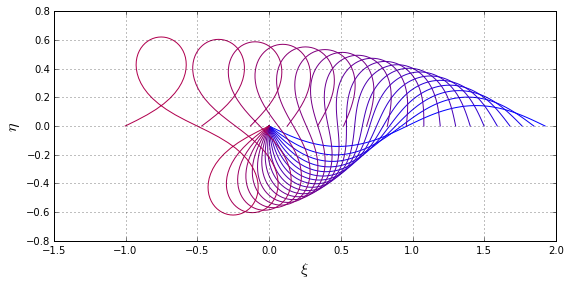

In [4]:
fig = plt.figure(figsize=(9,9))
ax = fig.gca(aspect='equal')
font = {'size'   : 16}

i=0
for (xi, eta) in zip(lst_xi, lst_eta):
    #frb = (i/30., i/30., 1)
    frb = (i/26., 0, 1-i/26.)
    ax.plot(xi, eta, color = frb)
    i += 1

ax.grid()
ax.set_xlabel(r'$\xi$', fontdict=font)
ax.set_ylabel(r'$\eta$', fontdict=font)

### 1.3 Distance between null-moment sections 

We introduce the adimensional distance between elastica sections $\delta = d/d_{crit}$. We will now compute the distance between null-moment sections as
$$\delta_{0M} = \frac{d_{0M}}{d_{crit}} = \xi(\pi/2, k) = \frac{2}{\pi} \bigl( E(\pi/2, k) + E(k) \bigr) - \frac{1}{\pi} \bigl( F(\pi/2, k) + K(k) \bigl) = \frac{2}{\pi} \bigl( 2 \,E(k) - K(k) \bigl)$$

In [5]:
EI = 5000.
P = -5000.
rng_H = np.linspace(-5000., 5000, 1001)

rng_theta0 = np.arccos(-rng_H/abs(P))
rng_k = np.sin(0.5*rng_theta0)

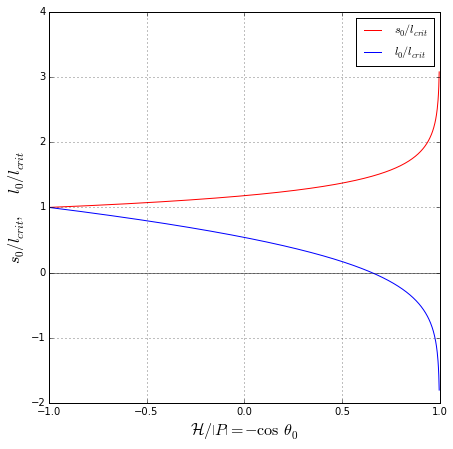

In [6]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
font = {'size'   : 16}
#matplotlib.rc('font', **font)
#ax.set_ylim(-1., 1.)
ax.axhline(color=(0.5,0.5,0.5))
#ax.axvline(color=(0.5,0.5,0.5))
ax.plot(-rng_H/P, 2*sp.ellipk(rng_k**2)/np.pi, color='r', label=r'$s_{0}/l_{crit}$')
ax.plot(-rng_H/P, 2*(2*sp.ellipe(rng_k**2) - sp.ellipk(rng_k**2))/np.pi, color='b', label=r'$l_{0}/l_{crit}$')
#ax.plot(rng_k, 2*sp.ellipk(rng_k**2)/np.pi, color='r')
#ax.plot(rng_k, 2*(2*sp.ellipe(rng_k**2) - sp.ellipk(rng_k**2))/np.pi, color='b')
ax.grid()
ax.legend()
ax.set_xlabel(r'$\mathcal{H}/\left|P\right| = -\cos\,\theta_0$', fontdict=font)
ax.set_ylabel(r'$s_{0}/l_{crit}, \;\;l_{0}/l_{crit}$', fontdict=font)

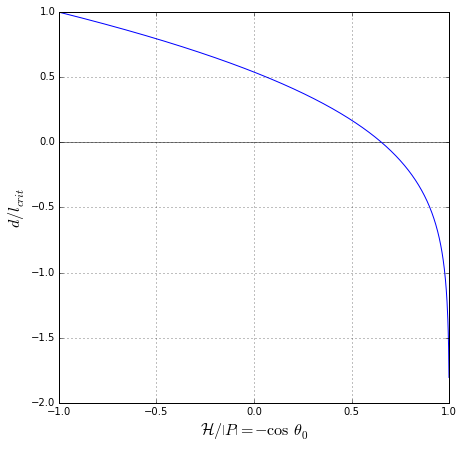

In [8]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
font = {'size'   : 16}
#matplotlib.rc('font', **font)
#ax.set_ylim(-1., 1.)
ax.axhline(color=(0.5,0.5,0.5))
#ax.axvline(color=(0.5,0.5,0.5))
#ax.plot(-rng_H/P, 2*sp.ellipk(rng_k**2)/np.pi, color='r', label=r'$s_{0}/l_{crit}$')
ax.plot(-rng_H/P, 2*(2*sp.ellipe(rng_k**2) - sp.ellipk(rng_k**2))/np.pi, color='b', label=r'$d/l_{crit}$')
#ax.plot(rng_k, 2*sp.ellipk(rng_k**2)/np.pi, color='r')
#ax.plot(rng_k, 2*(2*sp.ellipe(rng_k**2) - sp.ellipk(rng_k**2))/np.pi, color='b')
ax.grid()
#ax.legend()
ax.set_xlabel(r'$\mathcal{H}/\left|P\right| = -\cos\,\theta_0$', fontdict=font)
ax.set_ylabel(r'$d/l_{crit}$', fontdict=font)

### 1.4 Relation between null-moment distance and arc-length

The relation between null-moment distance and arclength is
$$\frac{d_{0M}}{s} = 2 \frac{E(k)}{K(k)} - 1$$

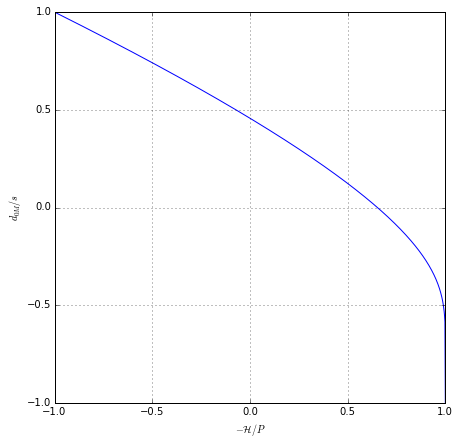

In [7]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca(aspect='equal')
ax.set_ylim(-1., 1.)
ax.plot(-rng_H/P, 2*sp.ellipe(rng_k**2)/sp.ellipk(rng_k**2) - 1, color='b')
ax.grid()
ax.set_xlabel(r'$-\mathcal{H}/P$')
ax.set_ylabel(r'$d_{0M}/s$')

### 1.5 Parametrized dimensionless section forces

$$\nu(\omega, k) = 2 k^2 \sin^2 \omega - 1$$
$$\upsilon(\omega, k) = 2 k \sin \omega \sqrt{ 1 - k^2 \sin^2 \omega}$$
$$\mu(\omega, k) = \frac{2}{\pi} k \cos{\omega}$$

In [8]:
EI = 5000.
P = -5000.
rng_H = np.arange(-4500., 5000, 500)

rng_theta0 = np.arccos(-rng_H/abs(P))
rng_k = np.sin(0.5*rng_theta0)

nVertex = 101
rng_w = np.linspace(-np.pi/2, 3*np.pi/2, nVertex)

lst_nu = []
lst_upsilon = []
lst_mu = []

for k in rng_k:
    rng_nu = []
    rng_upsilon = []
    rng_mu = []
    for w in rng_w:
        nu = 2 * k**2 * np.sin(w)**2 - 1.
        upsilon = 2 * k * np.sin(w) * np.sqrt(1 - k**2 * np.sin(w)**2)
        mu = 2 * k * np.cos(w) / np.pi
    
        rng_nu.append(nu)
        rng_upsilon.append(upsilon)
        rng_mu.append(mu)
    
    lst_nu.append(rng_nu)
    lst_upsilon.append(rng_upsilon)
    lst_mu.append(rng_mu)

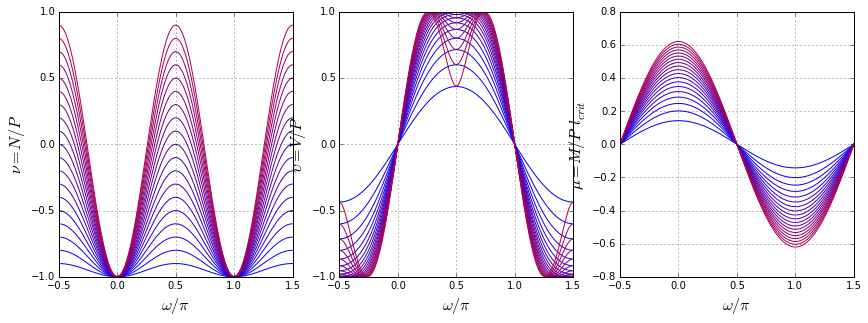

In [9]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(14.25, 4.75))  
font = {'size'   : 16}
i=0
for rng_nu in lst_nu:
    frb = (i/26., 0, 1-i/26.)
    ax0.plot(rng_w/np.pi, rng_nu, color=frb)
    i +=1
ax0.grid()
ax0.set_xlabel(r'$\omega/\pi$', fontdict=font)
ax0.set_ylabel(r'$\nu = N/P$', fontdict=font)

i=0
for rng_upsilon in lst_upsilon:
    frb = (i/26., 0, 1-i/26.)
    ax1.plot(rng_w/np.pi, rng_upsilon, color=frb)
    i +=1
ax1.grid()
ax1.set_xlabel(r'$\omega/\pi$', fontdict=font)
ax1.set_ylabel(r'$\upsilon = V/P$', fontdict=font)

i=0
for rng_mu in lst_mu:
    frb = (i/26., 0, 1-i/26.)
    ax2.plot(rng_w/np.pi, rng_mu, color=frb)
    i +=1
ax2.grid()
ax2.set_xlabel(r'$\omega/\pi$', fontdict=font)
ax2.set_ylabel(r'$\mu = M/P\,l_{crit}$', fontdict=font)

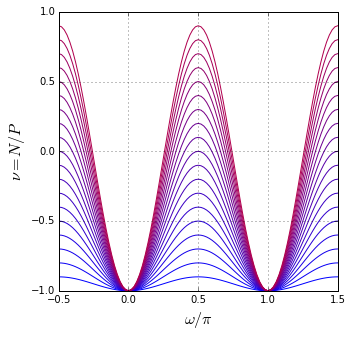

In [10]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
font = {'size'   : 16}
i=0
for rng_nu in lst_nu:
    frb = (i/26., 0, 1-i/26.)
    ax.plot(rng_w/np.pi, rng_nu, color=frb)
    i +=1
ax.grid()
ax.set_xlabel(r'$\omega/\pi$', fontdict=font)
ax.set_ylabel(r'$\nu = N/P$', fontdict=font)

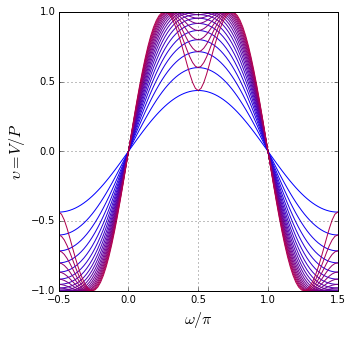

In [11]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
font = {'size'   : 16}
i=0
for rng_upsilon in lst_upsilon:
    frb = (i/26., 0, 1-i/26.)
    ax.plot(rng_w/np.pi, rng_upsilon, color=frb)
    i +=1
ax.grid()
ax.set_xlabel(r'$\omega/\pi$', fontdict=font)
ax.set_ylabel(r'$\upsilon = V/P$', fontdict=font)


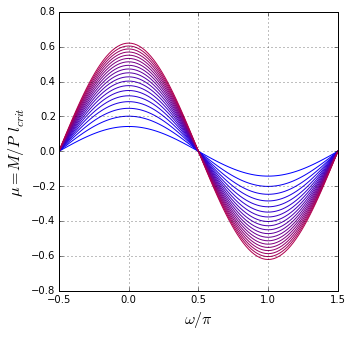

In [12]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
font = {'size'   : 16}
i=0
for rng_mu in lst_mu:
    frb = (i/26., 0, 1-i/26.)
    ax.plot(rng_w/np.pi, rng_mu, color=frb)
    i +=1
ax.grid()
ax.set_xlabel(r'$\omega/\pi$', fontdict=font)
ax.set_ylabel(r'$\mu = M/P\,l_{crit}$', fontdict=font)

### 1.6 Curvature

Considering that $M = |P| l_{crit} \mu$, the curvature $\kappa = M/EI$ can be expressed as
$$\kappa = \frac{|P|}{EI} l_{crit} \frac{2}{\pi} k \cos{\omega} = 2 \sqrt{\frac{|P|}{EI}} k \cos{\omega} = 2\pi \frac{k}{l_{crit}} \cos \omega$$
The dimensionless curvature is
$$\varkappa(\omega, k) = \kappa l_{crit} = 2\pi k \cos\omega$$

### 1.7 Relationship between sections distance and start-end parameter

We calculate the adimensional distance between rod sections using adimensional coordinate diferences
$$\Delta \xi = \frac{2}{\pi} \bigl( E(\omega + \Delta\omega, k) - E(\omega, k) \bigr) - \frac{1}{\pi} \bigl( F(\omega + \Delta\omega, k) - F(\omega, k) \bigr)$$
$$\Delta \eta = -\frac{2}{\pi} k \bigl( \cos(\omega + \Delta\omega) - \cos(\omega) \bigr)$$

Where $\omega$ is the start section parameter and $\Delta\omega$ is the parameter increment to the end section. Hence
$$\lambda(\omega, \Delta\omega, k) = \sqrt{(\Delta \xi)^2 + (\Delta \eta)^2}$$

In [13]:
rng_k = np.linspace(0.15, 0.90, 6)

nVertex = 101
rng_w = np.linspace(-np.pi/2, 3*np.pi/2, nVertex)
#rng_Deltaw = np.linspace(0, np.pi, int(np.floor(0.5*nVertex)+1))
rng_Deltaw = np.linspace(-np.pi, np.pi, nVertex)

lst_lambda = []

for k in rng_k:
    rng2_lambda = []
    i = 0
    for Deltaw in rng_Deltaw:
        rng_lambda = np.zeros(nVertex)
        j = 0
        for w in rng_w:
            Deltaxi = (2*(sp.ellipeinc(w+Deltaw,k**2) - sp.ellipeinc(w,k**2)) - (sp.ellipkinc(w+Deltaw,k**2) - sp.ellipkinc(w,k**2)))/np.pi
            Deltaeta = -2*k*(np.cos(w+Deltaw) - np.cos(w))/np.pi
            rng_lambda[j] = np.sqrt(Deltaxi**2 + Deltaeta**2)
            j += 1
        i += 1
        rng2_lambda.append(rng_lambda)
    
    lst_lambda.append(rng2_lambda)

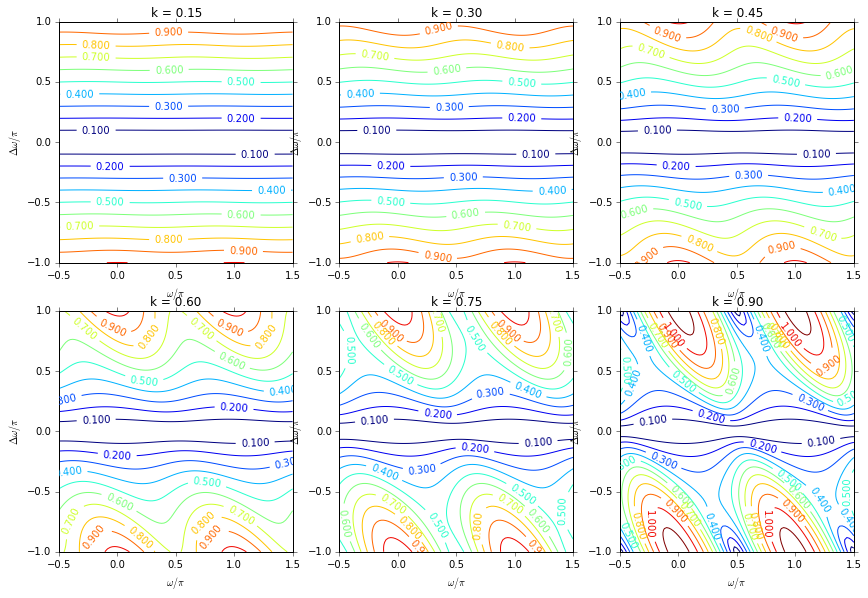

In [11]:
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

W, DW = np.meshgrid(rng_w, rng_Deltaw)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14.25, 9.5))
lvls = np.linspace(0.1, 1.1, 11)
i = 0
for axRow in axs:
    for ax in axRow:
        cs = ax.contour(W/np.pi, DW/np.pi, lst_lambda[i], levels=lvls)
        ax.clabel(cs, inline=1, fontsize=10)
        ax.set_xlabel(r'$\omega/\pi$')
        ax.set_ylabel(r'$\Delta\omega/\pi$')
        ax.set_title('k = {:.2f}'.format(rng_k[i]))
        i += 1


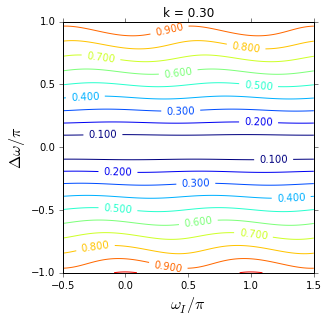

In [18]:
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

W, DW = np.meshgrid(rng_w, rng_Deltaw)

fig = plt.figure(figsize=(4.5,4.5))
ax = fig.gca()
font = {'size'   : 16}
lvls = np.linspace(0.1, 1.1, 11)
i = 0

cs = ax.contour(W/np.pi, DW/np.pi, lst_lambda[1], levels=lvls)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_xlabel(r'$\omega_I/\pi$', fontdict=font)
ax.set_ylabel(r'$\Delta\omega/\pi$', fontdict=font)
ax.set_title('k = {:.2f}'.format(rng_k[1]))
i += 1

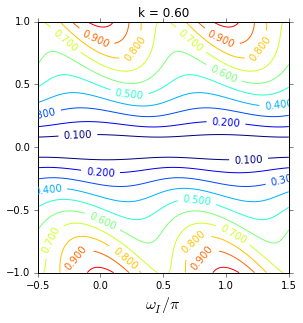

In [21]:
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

W, DW = np.meshgrid(rng_w, rng_Deltaw)

fig = plt.figure(figsize=(4.5,4.5))
ax = fig.gca()
font = {'size'   : 16}
lvls = np.linspace(0.1, 1.1, 11)
i = 0

cs = ax.contour(W/np.pi, DW/np.pi, lst_lambda[3], levels=lvls)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_xlabel(r'$\omega_I/\pi$', fontdict=font)
#ax.set_ylabel(r'$\Delta\omega/\pi$', fontdict=font)
ax.set_title('k = {:.2f}'.format(rng_k[3]))
i += 1

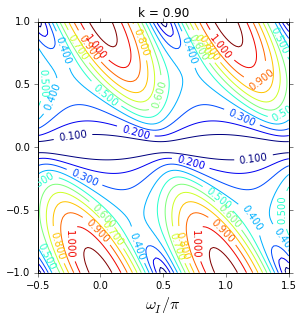

In [22]:
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

W, DW = np.meshgrid(rng_w, rng_Deltaw)

fig = plt.figure(figsize=(4.5,4.5))
ax = fig.gca()
font = {'size'   : 16}
lvls = np.linspace(0.1, 1.1, 11)
i = 0

cs = ax.contour(W/np.pi, DW/np.pi, lst_lambda[5], levels=lvls)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_xlabel(r'$\omega_I/\pi$', fontdict=font)
#ax.set_ylabel(r'$\Delta\omega/\pi$', fontdict=font)
ax.set_title('k = {:.2f}'.format(rng_k[5]))
i += 1

In [ ]:
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

W, DW = np.meshgrid(rng_w, rng_Deltaw)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14.25, 4.25))
font = {'size'   : 16}
lvls = np.linspace(0.1, 1.1, 11)
i = 0
for ax in axs:
    cs = ax.contour(W/np.pi, DW/np.pi, lst_lambda[2*i+1], levels=lvls)
    ax.clabel(cs, inline=1, fontsize=10)
    ax.set_xlabel(r'$\omega/\pi$', fontdict=font)
    ax.set_ylabel(r'$\Delta\omega/\pi$', fontdict=font)
    ax.set_title('k = {:.2f}'.format(rng_k[2*i+1]))
    i += 1

## 2 Form-finding of a simple rod

### 2.1 Problem formulation

Given  
1. $(x_A, y_A)$ and $(x_B, y_B)$
2. $M_A, M_B$
3. $R$ (compressive force at rod ends -negative-)

Find the configuration of the rod

In [188]:
# End coordinates
(xA, yA) = (0., 0.)    # m
(xB, yB) = (10.*np.cos(0.5), 10.*np.sin(0.5))

# End bending moments
MA = 40.    # kN m 
MB = 60.    # kN m

# Compressive Force
R = -5.    # kN

# Bending stiffness
EI = 500.    # kN m^2

### 2.2 Problem solution

#### 2.2.1 Computation of direct parameters

In [189]:
# Distance between rod end-sections and angle beta between x-axis and AB orientation
gammaA = xA + 1j*yA
gammaB = xB + 1j*yB
l = np.absolute(gammaB - gammaA)
beta = np.angle(gammaB - gammaA)

print('    l = {0:8.4f}  m,       beta = {1:8.4f}*pi rad'.format(l, beta/np.pi))

# Shear force S (perpendicular to R) 
S = (MA - MB)/l
print('    R = {0:8.4f} kN,          S = {1:8.4f} kN'.format(R, S))

# Invariant compressive force 
P = - np.sqrt(R**2 + S**2)
print('    P = {0:8.4f} kN'.format(P))

# Critical length and normalized distance
lcrit = np.pi * np.sqrt(EI/abs(P)) # Requires to check that lcrit > l
lmbd = l/lcrit
print('lcrit = {0:8.4f} m,  lambda_act = {1:8.4f}'.format(lcrit, lmbd))

# Adimensional moments
muA = MA/abs(P)/lcrit
muB = MB/abs(P)/lcrit
print('muA = {0:8.4f},             muB = {1:8.4f}'.format(muA, muB))

    l =  10.0000  m,       beta =   0.1592*pi rad
    R =  -5.0000 kN,          S =  -2.0000 kN
    P =  -5.3852 kN
lcrit =  30.2716 m,  lambda_act =   0.3303
muA =   0.2454,             muB =   0.3681


#### 2.2.2 Computation

Determine the lowest value for $k$ using $k = \frac{\pi}{2} \frac{\mu}{\cos{\omega}}$

In [190]:
kmin = max(np.pi*abs(muA)/2., np.pi*abs(muB)/2.)
print(kmin)

0.57814497206


Compute $\omega, \Delta\omega$ for a given $k$ using $\cos\omega = \frac{\pi}{2} \frac{\mu}{k}$

In [191]:
def omegaDeltaomega(muA, muB, k):
    omega = -np.arccos(np.pi*muA/2./k) # Cuidado con el signo
    Deltaomega = np.arccos(np.pi*muB/2./k) - omega
    return(omega, Deltaomega)

In [192]:
omega, Deltaomega = omegaDeltaomega(muA, muB, kmin)
print('muA = {0:8.4f},    muB = {1:8.4f}'.format(muA, muB))
print('omega = {}*pi rad,    Deltaomega = {}*pi rad'.format(omega/np.pi, Deltaomega/np.pi))

muA =   0.2454,    muB =   0.3681
omega = -0.267720472801*pi rad,    Deltaomega = 0.267720472801*pi rad


Compute $\lambda$ for $k$

In [193]:
def lmbdk(k):
    w = -np.arccos(np.pi*muA/2./k)
    Deltaw = np.arccos(np.pi*muB/2./k) - w
    Deltaxi = (2*(sp.ellipeinc(w+Deltaw,k**2) - sp.ellipeinc(w,k**2)) - (sp.ellipkinc(w+Deltaw,k**2) - sp.ellipkinc(w,k**2)))/np.pi
    Deltaeta = -2*k*(np.cos(w+Deltaw) - np.cos(w))/np.pi
    lmbd = np.sqrt(Deltaxi**2 + Deltaeta**2)
    return(lmbd)

In [194]:
rng_k = np.arange(kmin, 1., 0.05)
for k in rng_k:
    f = lmbd - lmbdk(k)
    print(k, lmbdk(k), f)

(0.57814497206037641, 0.26845262302524669, 0.061890008909515737)
(0.62814497206037645, 0.39027008160206145, -0.059927449667299015)
(0.67814497206037649, 0.42851988822776949, -0.098177256293007054)
(0.72814497206037654, 0.44426119339067649, -0.11391856145591406)
(0.77814497206037658, 0.44394457604639509, -0.11360194411163266)
(0.82814497206037663, 0.42966639158585462, -0.099323759651092192)
(0.87814497206037667, 0.40162277213715725, -0.071280140202394815)
(0.92814497206037672, 0.35842453475721447, -0.028081902822452043)
(0.97814497206037676, 0.29640942317227481, 0.033933208762487621)


For given $M_{A}$, $M_{B}$ the $\lambda_{act} - \lambda(M_{A}, M_{B}, k) = 0$ can be solved for $k$ 

In [195]:
from scipy.optimize import brentq

In [196]:
def f(k):
    w = -np.arccos(np.pi*muA/2./k)
    Deltaw = np.arccos(np.pi*muB/2./k) - w
    Deltaxi = (2*(sp.ellipeinc(w+Deltaw,k**2) - sp.ellipeinc(w,k**2)) - (sp.ellipkinc(w+Deltaw,k**2) - sp.ellipkinc(w,k**2)))/np.pi
    Deltaeta = -2*k*(np.cos(w+Deltaw) - np.cos(w))/np.pi
    ll = np.sqrt(Deltaxi**2 + Deltaeta**2)
    return(lmbd - ll)

In [197]:
target_k = brentq(f, kmin, 0.75)
print('k = {:.5f}, theta_0 = {:.5f} pi'.format(target_k, 2*np.arcsin(target_k)/np.pi))

k = 0.59069, theta_0 = 0.40229 pi


In [198]:
nVertex = 101

(omega, Deltaomega) = omegaDeltaomega(muA, muB, target_k)
rng_w = np.linspace(omega, omega + Deltaomega, nVertex)

rng_zeta = []
rng_xi = []
rng_eta = []
for w in rng_w:
    zeta = (sp.ellipkinc(w,target_k**2) + sp.ellipk(target_k**2))/np.pi
    xi = 2*(sp.ellipeinc(w,target_k**2) + sp.ellipe(target_k**2))/np.pi - zeta
    eta = -2*target_k*np.cos(w)/np.pi
    
    rng_zeta.append(zeta)
    rng_xi.append(xi)
    rng_eta.append(eta)

In [199]:
print('muA = {0:8.4f},    muB = {1:8.4f}'.format(muA, muB))
print('omega = {}*pi rad,    Deltaomega = {}*pi rad'.format(omega/np.pi, Deltaomega/np.pi))

muA =   0.2454,    muB =   0.3681
omega = -0.273716153146*pi rad,    Deltaomega = 0.339431541997*pi rad


In [200]:
rng_xi = np.asarray(rng_xi)
rng_eta = np.asarray(rng_eta)

alpha = np.arctan((rng_eta[-1]-rng_eta[0])/(rng_xi[-1]-rng_xi[0]))
print(alpha)

rng_x = xA + np.cos(beta - alpha)*lcrit*(rng_xi - rng_xi[0]) - np.sin(beta - alpha)*lcrit*(rng_eta - rng_eta[0])
rng_y = yA + np.sin(beta - alpha)*lcrit*(rng_xi - rng_xi[0]) + np.cos(beta - alpha)*lcrit*(rng_eta - rng_eta[0])

-0.380506377112


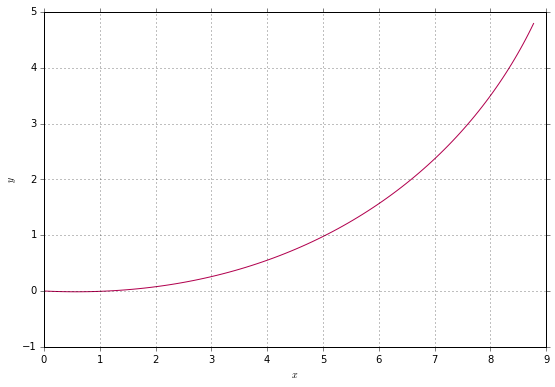

In [201]:
fig = plt.figure(figsize=(9,9))
ax = fig.gca(aspect='equal')

ax.plot(rng_x, rng_y, color = frb)

ax.grid()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')